## TimeZone, Visualizing

In [1]:
# 필요한 library import
from datetime import datetime
from datetime import timezone
from datetime import timedelta
import pytz
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates

### TimeZone

#### utc

In [2]:
# timezone 확인(timezone은 utc밖에 없음)
timezone.utc

datetime.timezone.utc

In [3]:
# timezone unawared datetime
datetime(2019, 1, 1)

datetime.datetime(2019, 1, 1, 0, 0)

In [4]:
# timezone awared datetime
datetime(2019, 1, 1, tzinfo = timezone.utc)

datetime.datetime(2019, 1, 1, 0, 0, tzinfo=datetime.timezone.utc)

#### pytz

In [5]:
# pytz의 모든 timezone 확인
pytz.all_timezones

['Africa/Abidjan', 'Africa/Accra', 'Africa/Addis_Ababa', 'Africa/Algiers', 'Africa/Asmara', 'Africa/Asmera', 'Africa/Bamako', 'Africa/Bangui', 'Africa/Banjul', 'Africa/Bissau', 'Africa/Blantyre', 'Africa/Brazzaville', 'Africa/Bujumbura', 'Africa/Cairo', 'Africa/Casablanca', 'Africa/Ceuta', 'Africa/Conakry', 'Africa/Dakar', 'Africa/Dar_es_Salaam', 'Africa/Djibouti', 'Africa/Douala', 'Africa/El_Aaiun', 'Africa/Freetown', 'Africa/Gaborone', 'Africa/Harare', 'Africa/Johannesburg', 'Africa/Juba', 'Africa/Kampala', 'Africa/Khartoum', 'Africa/Kigali', 'Africa/Kinshasa', 'Africa/Lagos', 'Africa/Libreville', 'Africa/Lome', 'Africa/Luanda', 'Africa/Lubumbashi', 'Africa/Lusaka', 'Africa/Malabo', 'Africa/Maputo', 'Africa/Maseru', 'Africa/Mbabane', 'Africa/Mogadishu', 'Africa/Monrovia', 'Africa/Nairobi', 'Africa/Ndjamena', 'Africa/Niamey', 'Africa/Nouakchott', 'Africa/Ouagadougou', 'Africa/Porto-Novo', 'Africa/Sao_Tome', 'Africa/Timbuktu', 'Africa/Tripoli', 'Africa/Tunis', 'Africa/Windhoek', 'Ameri

In [6]:
# timezone과 pytz 비교
datetime(2019, 1, 1, tzinfo = timezone.utc) == pytz.UTC.localize(datetime(2019, 1, 1))

True

In [7]:
# timezone이 KST인 datetime 입력
KST = pytz.timezone('Asia/Seoul')
KST.localize(datetime(2019, 1, 1))

datetime.datetime(2019, 1, 1, 0, 0, tzinfo=<DstTzInfo 'Asia/Seoul' KST+9:00:00 STD>)

In [8]:
# timezone이 utc인 지역과 kst인 지역 비교
datetime(2019, 1, 1, tzinfo = timezone.utc) == KST.localize(datetime(2019, 1, 1))

False

#### localize

In [9]:
# datetime 설정
mydate = datetime(2019, 1, 1)

In [10]:
# datetime의 year을 replace로 변경
mydate.replace(year = 2018)

datetime.datetime(2018, 1, 1, 0, 0)

In [11]:
# datetime의 timezone은 replace로 변경 불가
mydate.replace(tzinfo=KST)

datetime.datetime(2019, 1, 1, 0, 0, tzinfo=<DstTzInfo 'Asia/Seoul' LMT+8:28:00 STD>)

In [12]:
# datetime의 timezone을 localize로 변경
mydate_kst = KST.localize(mydate)
mydate_kst

datetime.datetime(2019, 1, 1, 0, 0, tzinfo=<DstTzInfo 'Asia/Seoul' KST+9:00:00 STD>)

#### astimezone

In [13]:
# mydate의 timezone을 utc로 변경(동일한 시간)
mydate_kst.astimezone(pytz.utc)

datetime.datetime(2018, 12, 31, 15, 0, tzinfo=<UTC>)

In [14]:
# timezone이 달라도 동일한 시간인 것 확인
mydate_kst.astimezone(pytz.utc) == mydate_kst

True

#### strftime

In [15]:
# timezone의 포맷 설정(strftime)
# strftime.org
mydate_kst.strftime("%Y-%m-%d %H:%M:%S%Z")

'2019-01-01 00:00:00KST'

In [16]:
# timezone을 utc로 변경하고 포맷 설정(동일한 시간)
mydate_kst.astimezone(pytz.utc).strftime("%Y-%m-%d %H:%M:%S%Z")

'2018-12-31 15:00:00UTC'

#### utcnow

In [17]:
# 현재시각을 KST timezone으로 확인
datetime.utcnow().astimezone(KST)

datetime.datetime(2019, 3, 18, 6, 37, 36, 223270, tzinfo=<DstTzInfo 'Asia/Seoul' KST+9:00:00 STD>)

#### timedelta

In [18]:
# utc timezone과 KST timezone의 시간 차이 확인
pytz.utc.localize(mydate) - KST.localize(mydate)

datetime.timedelta(0, 32400)

In [19]:
# 위에서 구한 시간차이를 uct timezone에 더한 시간
pytz.utc.localize(mydate) + timedelta(seconds = 32400)

datetime.datetime(2019, 1, 1, 9, 0, tzinfo=<UTC>)

In [20]:
# 오늘 요일 확인
today = datetime.today()
today.weekday()

0

In [21]:
# 가장 최근 금요일 확인
def last_friday():
    KST = pytz.timezone('Asia/Seoul')
    today = KST.localize(datetime.today())
    offset = 4 - today.weekday() % 4
    aweekago = today - timedelta(weeks = 1)
    last_friday = aweekago + timedelta(days = offset)
    return last_friday

last_friday()

datetime.datetime(2019, 3, 15, 15, 37, 37, 23130, tzinfo=<DstTzInfo 'Asia/Seoul' KST+9:00:00 STD>)

### Visualizing

In [22]:
# 필요한 csv 파일 불러오기
df_apple = pd.read_csv('apple_stock.csv', index_col = 'Date', parse_dates = True)

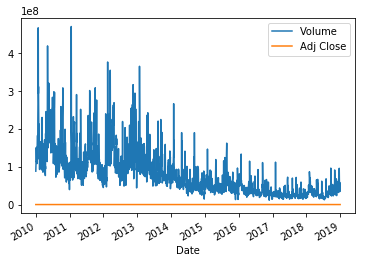

In [23]:
# Volume, Adj Close column plot
df_apple[['Volume', 'Adj Close']].plot()

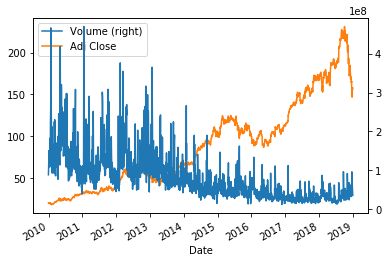

In [24]:
# 보조축 설정
df_apple[['Volume', 'Adj Close']].plot(secondary_y = ['Volume'])

Text(0.5, 1.0, 'APPLE')

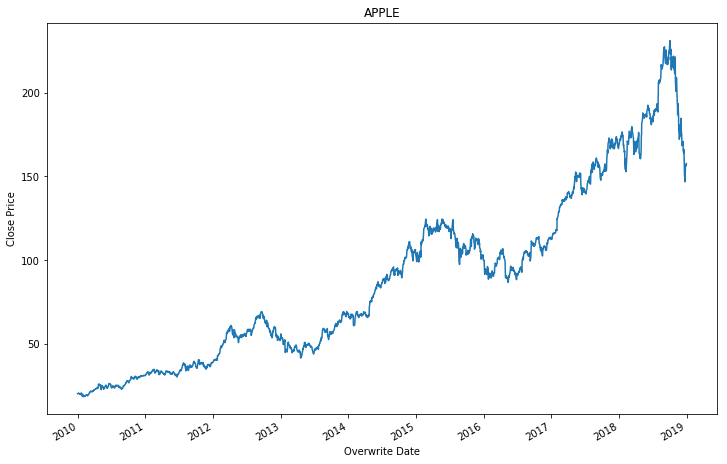

In [25]:
# 범례, 제목 설정
df_apple['Adj Close'].plot(figsize = (12, 8))
plt.ylabel('Close Price')
plt.xlabel('Overwrite Date')
plt.title('APPLE')

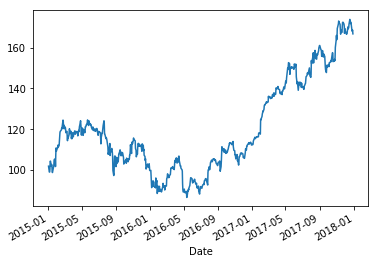

In [26]:
# x축 범위 설정
df_apple['Adj Close']['2015-01-01':'2018-01-01'].plot()

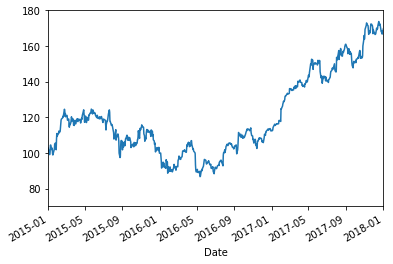

In [27]:
# x축, y축 범위 설정
df_apple['Adj Close'].plot(xlim=['2015-01-01', '2018-01-01'], ylim = [70, 180])

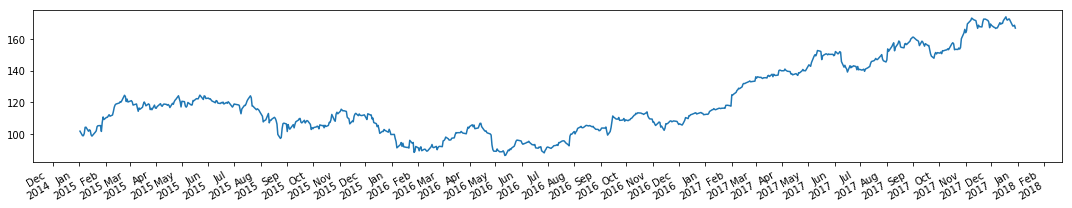

In [28]:
# x축 설정
index = df_apple['2015-01-01':'2018-01-01'].index
stock = df_apple['2015-01-01':'2018-01-01']['Adj Close']

fig, ax = plt.subplots(figsize = (15, 3))
ax.plot_date(index, stock, '-')
ax.xaxis.set_major_locator(dates.MonthLocator()) # x축 단위를 month로 설정
ax.xaxis.set_major_formatter(dates.DateFormatter('%b\n%Y')) # x축을 월/연도로 표시되도록 설정
fig.autofmt_xdate() # x축 겹치지 않게 눕히기
plt.tight_layout() # x축 겹치지 않게 하기